# Scientific Python

## Contents
- [numpy](#Numpy)
- [matplotlib](#Matplotlib)
- [sympy](#Sympy)
- [scipy](#Scipy)
    - [special functions](#Special-Functions)
    - [ODE solvers](#ODE-Solvers)
- [pandas](#Pands)
- [seaborn](#Seaborn)
- [scikit learn](#Scikit-Learn)

# Numpy

- Multidimensional numerical arrays
- Basic math functions (sin, cos, exp, etc.)
- Elementwise/matrix operations
- Basic linear algebra
- As in Matlab

In [5]:
from numpy import *

In [6]:
a = array([1,2,3,5])
a

array([1, 2, 3, 5])

In [7]:
b = array([
    [1,2,3],
    [7,4,2]
])
b

array([[1, 2, 3],
       [7, 4, 2]])

In [8]:
b.T

array([[1, 7],
       [2, 4],
       [3, 2]])

- Create even grids with arange/linspace
- `arange(min, max, step)` (excludes upper endpoint)
- `linspace(min, max, num)` (includes upper endpoint)

In [9]:
arange(1,2,0.2)

array([ 1. ,  1.2,  1.4,  1.6,  1.8])

In [10]:
linspace(0,1,11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

- Arrays of zeros/ones

In [11]:
zeros([5,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [12]:
ones([3,7])

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [13]:
arange(8).reshape([2,2,2])

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

## Array operations are _elementwise_ by default

##### That means no dots needed as in Matlab (.* .^ ./ etc.)

In [14]:
A=arange(25).reshape([5,5])
print()

b=arange(5,10).reshape([5,1])

\begin{equation}
    \left[\begin{matrix}0.0 & 1.0 & 2.0 & 3.0 & 4.0\\5.0 & 6.0 & 7.0 & 8.0 & 9.0\\10.0 & 11.0 & 12.0 & 13.0 & 14.0\\15.0 & 16.0 & 17.0 & 18.0 & 19.0\\20.0 & 21.0 & 22.0 & 23.0 & 24.0\end{matrix}\right] \left[\begin{matrix}5.0\\6.0\\7.0\\8.0\\9.0\end{matrix}\right] \; = \quad ?
\end{equation}

### Elementwise

In [15]:
A*b

array([[  0,   5,  10,  15,  20],
       [ 30,  36,  42,  48,  54],
       [ 70,  77,  84,  91,  98],
       [120, 128, 136, 144, 152],
       [180, 189, 198, 207, 216]])

### Matrix multiplication

In [16]:
A@b

array([[ 80],
       [255],
       [430],
       [605],
       [780]])

# Element-wise boolean operations

In [17]:
arr = arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
bool1 = (arr == 3)
bool1

array([False, False, False,  True, False, False, False, False, False, False], dtype=bool)

In [19]:
bool2 = (arr<3)
bool2

array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool)

In [20]:
arr[bool2]

array([0, 1, 2])

# Matplotlib
- Highly configurable, publication quality 2d figures
- Near-identical clone of matplotlib's plotting functions

In [21]:
from matplotlib.pyplot import *

Inline plots in notebooks possible via `%matplotlib inline`

Or, use a shortcut: `%pylab inline`, which more or less does:
- `from numpy import *`
- `from matplotlib.pyplot import *`
- `%matplotlib inline`

Basic idea:
- an `axes` is a single plot
- a `figure` is the canvas on which one or more plots are rendered

## Basic plotting

In [22]:
plot(random.rand(10))

In [23]:
%matplotlib inline

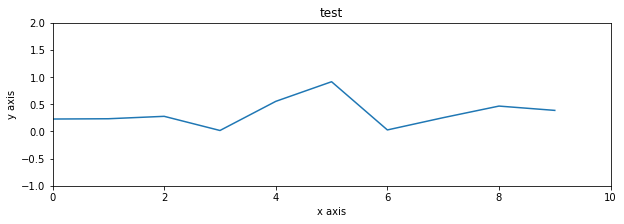

In [24]:
figure(figsize=[10,3])
x = arange(10)
y = random.rand(10)
plot(x, y)
title("test")
xlim(0,10)
ylim(-1,2)
xlabel("x axis")
ylabel("y axis")

## Styling the plot command

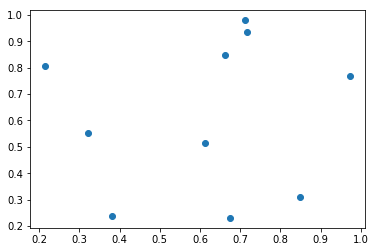

In [25]:
x, y = random.rand(2,10)
plot(x, y, 'o')

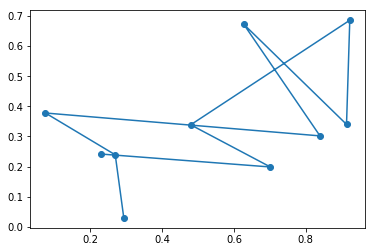

In [26]:
x, y = random.rand(2,10)
plot(x, y, 'o-')

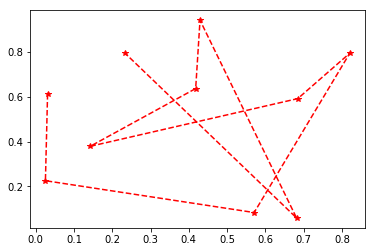

In [27]:
x, y = random.rand(2,10)
plot(x, y, '*--r')

## Subplots

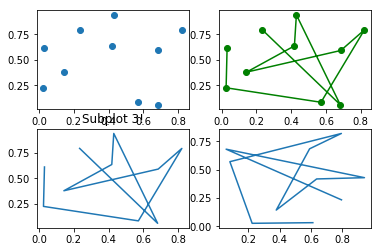

In [28]:
subplot(221)
plot(x, y, 'o')

subplot(222)
plot(x, y, 'og-')

subplot(223)
plot(x, y)
title('Subplot 3!')

subplot(224)
plot(y, x)

## Other plots

In [29]:
x = linspace(0, 1, 101)
y = linspace(0, 1, 101)
X, Y = meshgrid(x, y)
Z = X**2 + Y**2

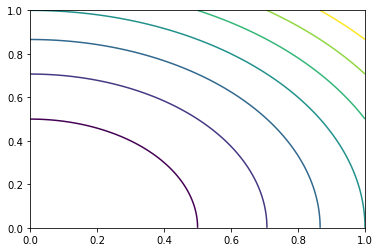

In [30]:
contour(X, Y, Z)

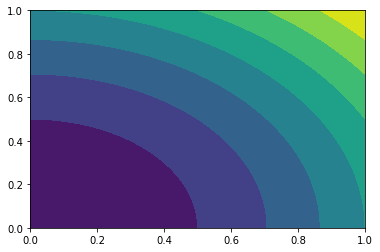

In [31]:
contourf(X, Y, Z)

# Colormaps

[colormaps docs](https://matplotlib.org/users/colormaps.html)

# Matplotlib 3D

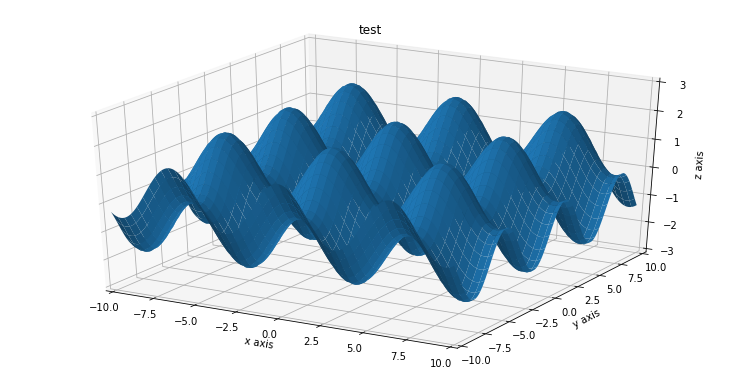

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=[10,5])
ax = Axes3D(fig)
x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
X,Y = meshgrid(x,y)
Z = cos(X) + sin(Y)
ax.plot_surface(X, Y, Z)
title("test")
xlim(-10,10)
ylim(-10,10)
ax.set_zlim3d([-3,3])
xlabel("x axis")
ylabel("y axis")
ax.set_zlabel("z axis")

# Sympy
- Symbolic mathematics
- As in Mathematica/Maple

In [33]:
import sympy as sp
sp.init_printing()

In [34]:
def f(x): return x*sp.sin(2*sp.pi*x) * sp.cos(2*sp.pi*x)

In [35]:
t = sym.var('t')
sym.plot(f(t),(t,-1,1));

NameError: name 'sym' is not defined

## Calculus with Sympy

In [ ]:
sym.limit(f(t),t,0)

In [ ]:
sym.diff(f(t),t)

In [ ]:
sym.integrate(f(t),(t,-1,1))

## Algebra with Sympy

In [ ]:
expr=(1+t)*(1-t) + sym.sin(sym.acos(t))
expr

In [ ]:
sym.simplify(expr)

# Scipy

- "Fundamentals of scientific computing"

- special functions
- more linear algebra than numpy
- interpolation
- numerical integration
- statistics functions
- sparse matrices
- ODE solvers
- Image manipulation/convolution
- Fourier Transforms
- Optimization/root finding
- etc.

## Special Functions

In [ ]:
from scipy.special import erf,j0,gamma

In [ ]:
x=arange(-4,4,0.1)
plot(x,erf(x),x,j0(x),x,gamma(x));
axis([-4,4,-2,2]);

## ODE Solvers

In [ ]:
### Comparable to ode45 / ode15s, depending on mode
from scipy.integrate import odeint,ode

#### <center> 2nd Order ODE
<sub>
\begin{align}
y''(x) &= y^2 + y' \\
y(0) &= 1 \\
y'(0) &= 0 \\
x & \in [0,5]
\end{align}
</sub>
</center>

In [ ]:
# Declare the model
def rhs(y, t):
    dy=[0,0]
    dy[0] = y[1]
    dy[1] = y[0]**2 - y[1]
    return dy
time = arange(0,1,1e-4)
yinit = array([1.0, 0.0])

In [ ]:
y = odeint(rhs, yinit, time)

figure(figsize=[12,6])
plot(time,y[:,0])
plot(time,y[:,1])
legend(["$y$","$y'$"],loc='best');

# Pandas

- 2D Arrays with named columns
- statistics & plotting built in

In [ ]:
import pandas as pd
pd.options.display.max_rows=10

In [ ]:
names = ['Frank','Maddy','Claire']
attributes = ['height','weight','shirt size','nose length','typing speed','grade']
data = random.randint(10,20,[3,6])
df = pd.DataFrame(data,index=names,columns=attributes)

In [ ]:
df

In [ ]:
df.plot(x='shirt size', y='grade')

# Seaborn

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [ ]:
iris = sns.load_dataset("iris")
iris

In [ ]:
figure(figsize=[10,6])
sns.distplot(iris['sepal_length']);

In [ ]:
sns.pairplot(iris,hue='species',size=2);

# Scikit-Learn

# Other libraries of note
- scikit-learn - machine learning
- 
- datashader, vaex - massive data visualization